We start our project by first demonstrating with detailed notes how to decompose 1 song in to features Once this is complete, we will assume this knowledge is understood and have a 2nd process for handling 1000 songs. 

This song is 30 seconds long.
The sampling rate of this file is: 22050. It represents how many times per second the audio is sampled.
The value "x" represents the wave form of a song, which contains 661504 slices.
The approximate duration of the song is: 30.00018140589569. Which is what we expect since all songs are 30 seconds long.


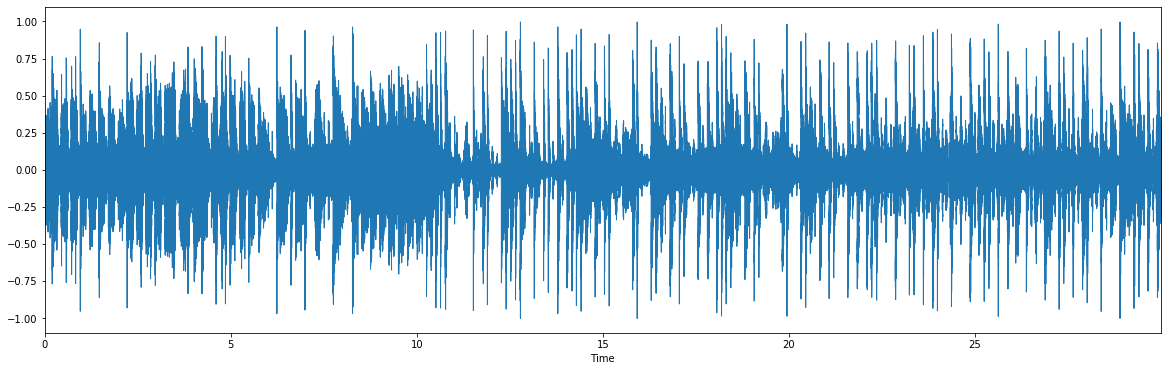

In [55]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import sklearn

print("We start our project by first demonstrating with detailed notes how to decompose 1 song in to features " +
     "Once this is complete, we will assume this knowledge is understood and have a 2nd process for handling " +
     "1000 songs. \n")

print("This song is 30 seconds long.")
file_path = '../resources/genres/hiphop/hiphop.00000.wav'

## TODO: Verify Librosa.load is converting to using FFT. Write this in.
x , sampling_rate = librosa.load(file_path)


print("The sampling rate of this file is: {0}. It represents how many times ".format(sampling_rate) +
      "per second the audio is sampled.")
print("The value \"x\" represents the wave form of a song, which contains {0} slices.".format(x.shape[0]))
print("The approximate duration of the song is: {0}. Which is what we expect since all songs are 30 seconds long.".format(len(x)/sampling_rate))


plt.figure(figsize=(20, 6))
librosa.display.waveplot(x, sr=sampling_rate)

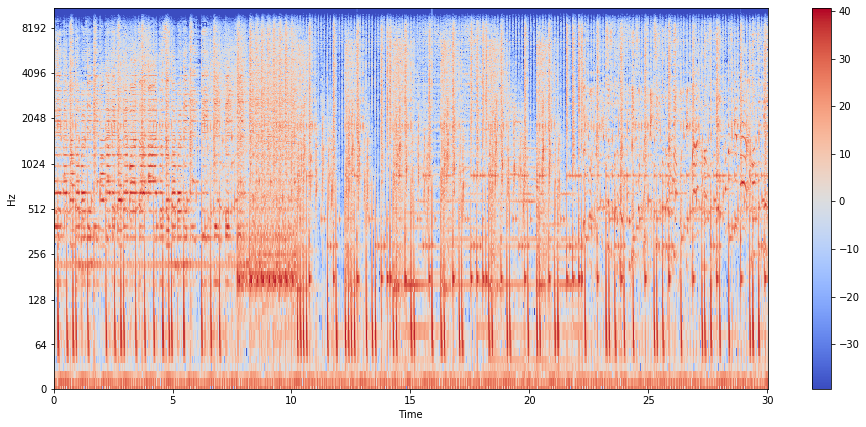

In [30]:
## Step 2. Apply Fast Fourier Transform to Decompose Wave Form to base frequencies

wav_form = librosa.stft(x)
wav_form_db = librosa.amplitude_to_db(abs(wav_form))
plt.figure(figsize=(16,7))
librosa.display.specshow(wav_form_db, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar()

## TODO: Add comments explaining what we did above.
## TODO: Explain spectogram below

From the image below which represents a small slice of time. The number of crossings 0 is 15 



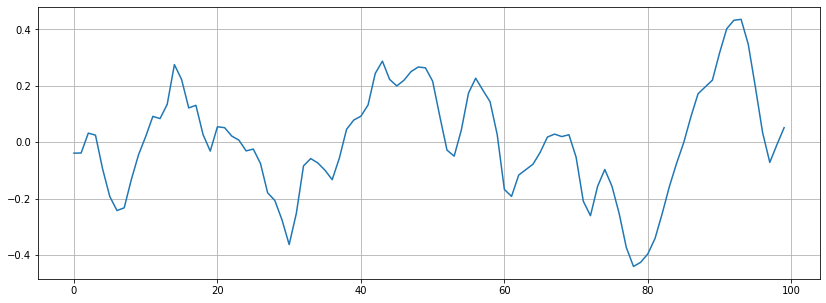

In [62]:
##### Step 3. Use the "wav_form_dB" decomposed song for Feature Extraction

# Feature 1: Zero-Crossing Rate 
## This represents how many times the frequency passes the "0" x-axis in either negative or positive direction
m0 = 10000
m1 = 10100
plt.figure(figsize=(14,5))
plt.plot(x[m0:m1])
plt.grid()
zero_crossing_sample = librosa.zero_crossings(x[m0:m1], pad=False)
print("From the image below which represents a small slice of time. The number of crossings " +
     "0 is {0} \n".format(sum(zero_crossing_sample)))


In [50]:
# Zero Crossing feature applied to entire song
zero_crossings = librosa.zero_crossings(x)
print("When this idea of zero crossings is extended to the entire 30 second portion of a song, this song has " +
     "{0} zero crossings".format(sum(zero_crossings)))

When this idea of zero crossings is extended to the entire 30 second portion of a song, this song has 97629 zero crossings


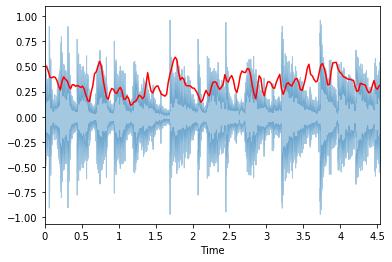

In [59]:
# Feature 2: Spectral Centroid 
## This feature represents taking a "slice" of a song and then taking the average of all frequencies at the
## point in time the slice represents. Extend this idea to ALL slices that make up a song, and
## using these averages plot a line that traverses exactly through each point, this is the Spectral Centroid
## of a song. This is important because two different genres may "generally" have a different spectral centroid line.

# Smaller Sample taken for demonstration below
n0 = 100000
n1 = 200000
x_sample = x[n0:n1]
spectral_centroids_sample = librosa.feature.spectral_centroid(x_sample, sr=sampling_rate)[0]
spectral_centroids.shape

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalize
def normalize(x_sample, axis=0):
    return sklearn.preprocessing.minmax_scale(x_sample, axis=axis)

librosa.display.waveplot(x_sample, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

## Alternative representations


## TODO: Add comment to describe code above. Change code above slightly also.
## TODO: Add comment describing image below.

In [ ]:
# Full song taken as spectral_centroid

spectral_centroids = librosa.feature.spectral_centroid(x, sr=sampling_rate)[0]